In [1]:
import os, sys, shutil
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import numpy as np
from math import ceil

from sys import exc_info

In [65]:
RESULT_DIR = '../results_exemplars/'

dataset_names = {
    'scene' : 'Scenes', 
    'cub' : 'Birds', 
    'flower' : 'Flowers', 
    'actions' : 'Actions',
    'cifar100_icarl' : 'CIFAR-100',
}

results = []
for d in os.listdir(RESULT_DIR):
    try:
        with open(f'{RESULT_DIR}/{d}/args.txt', 'rt') as f, open(f'{RESULT_DIR}/{d}/results/wavg_accs_tag.txt', 'rt') as f2:
            args = json.load(f)
            accs = [float(v) for v in f2.readlines()[-1].split()]
            # accs = np.array([float(v) for v in f2.readlines()[-1].split()])
#             acc = np.mean(accs)
            acc = accs[9]
            method = args['approach']
            if method == 'eeil':
                if args['lamb'] == 0:
                    method += '-NO-DISTILL'
                if args.get('unbalanced_no_exemplars', False):
                    method += '-UNBAL-NO-EXEMPLARS'
            elif method == 'lwf_ft':
                method = 'lwf-ONLY-NEW+BALANCED-FT'
            elif method == 'lwf':
                method += '-KD:SH'
                if args.get('kd_only_new', False):
                    method += '-KD:ONLY-NEW'
                if args.get('ce_all_outputs', False):
                    method += '-CE:SH'
                    assert args['num_exemplars_per_class'] == 0, 'ce_all_outputs should be run without exemplars!'
                if args.get('ce_exemplars_task_aware', False):
                    method += '-CE:MH'
                    # assert args['num_exemplars_per_class'] > 0, 'ce_exemplars_task_aware should be run with exemplars!'
                if args.get('ce_additional_current_task', False):
                    method += '-CE:SH_CURRENT'
                    
                if 'CE' not in method and args['num_exemplars_per_class'] > 0:
                    method += '-CE:SH'
                
#                 if 'CE' not in method and args['num_exemplars_per_class'] == 0:
#                     method += '-CE:MH'    
               
            elif method == 'finetune':
                if args.get('all_outputs', False):
                    method += '-CE:SH'
                    
            results.append({'Dataset': dataset_names[args['datasets'][0]], 'acc': round(acc * 100,2),
                'tasks': args['num_tasks'], 'method': method, 
                'exemplars_per_class' : args['num_exemplars_per_class'],
                'dir' : f"{RESULT_DIR}/{d}/" 
                })
    except: 
        print(exc_info())
        print(f'Skipping: {d}')

(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7f5a1b24bbc0>)
Skipping: cifar100_icarl_lwf_cifar100_10tasks_lwf_new_ce_multihead-12222020_203122_313257
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7f5a1af48e80>)
Skipping: cifar100_icarl_lwf_cifar100_10tasks_kd_only_new-12162020_193650_634240
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7f5a1adaffc0>)
Skipping: cifar100_icarl_lwf_ft_cifar100_10tasks-12262020_195741_115744


In [66]:

df = pd.DataFrame(results).sort_values(['Dataset', 'tasks', 'method', 'exemplars_per_class'])

In [67]:
with pd.option_context("display.max_rows", 9999, "display.max_columns", 999):
    display(df)

,Dataset,acc,tasks,method,exemplars_per_class,dir
23,CIFAR-100,24.99,10,bic,10,../results_exemplars//cifar100_icarl_bic_cifar...
93,CIFAR-100,30.56,10,bic,20,../results_exemplars//cifar100_icarl_bic_cifar...
21,CIFAR-100,33.18,10,bic,30,../results_exemplars//cifar100_icarl_bic_cifar...
79,CIFAR-100,38.84,10,bic,50,../results_exemplars//cifar100_icarl_bic_cifar...
57,CIFAR-100,28.80,10,eeil,10,../results_exemplars//cifar100_icarl_eeil_cifa...
50,CIFAR-100,36.62,10,eeil,20,../results_exemplars//cifar100_icarl_eeil_cifa...
92,CIFAR-100,39.68,10,eeil,30,../results_exemplars//cifar100_icarl_eeil_cifa...
9,CIFAR-100,44.32,10,eeil,50,../results_exemplars//cifar100_icarl_eeil_cifa...
29,CIFAR-100,0.00,10,eeil-NO-DISTILL,0,../results_exemplars//cifar100_icarl_eeil_cifa...
91,CIFAR-100,28.80,10,eeil-NO-DISTILL,10,../results_exemplars//cifar100_icarl_eeil_cifa...


In [68]:
df.loc[(df.method=='eeil-NO-DISTILL') & (df.exemplars_per_class == 0), 'acc'] = 0.0

In [69]:
TO_REMOVE = ['eeil-NO-SISTILL', 'lwf_old_new_balanced', 'lwf-KD:SH']
df = df[~df.method.isin(TO_REMOVE)]

In [70]:
df.method.unique()

array(['bic', 'eeil', 'eeil-NO-DISTILL', 'eeil-UNBAL-NO-EXEMPLARS', 'ewc',
       'finetune', 'finetune-CE:SH', 'lwf-KD:SH-CE:MH', 'lwf-KD:SH-CE:SH',
       'lwf-KD:SH-CE:SH_CURRENT', 'lwf-KD:SH-KD:ONLY-NEW',
       'lwf-KD:SH-KD:ONLY-NEW-CE:MH', 'lwf-KD:SH-KD:ONLY-NEW-CE:SH',
       'lwf-ONLY-NEW+BALANCED-FT'], dtype=object)

In [71]:
PLOT_1 = ['bic', 'eeil', 'eeil-NO-DISTILL', 'eeil-UNBAL-NO-EXEMPLARS', 'ewc',
       'finetune', 'lwf-KD:SH-CE:MH', 'lwf-KD:SH-CE:SH']

PLOT_2 = ['lwf-KD:SH-CE:MH', 'lwf-KD:SH-CE:SH',
       'lwf-KD:SH-CE:SH_CURRENT',
       'lwf-KD:SH-KD:ONLY-NEW-CE:MH', 'lwf-KD:SH-KD:ONLY-NEW-CE:SH',
       'lwf-ONLY-NEW+BALANCED-FT']

In [72]:
df_all = df.copy()

In [73]:
# plot 10 tasks
df = df_all[df_all.method.isin(PLOT_2)]
df_plot = df[df.tasks == 10].pivot_table(index='exemplars_per_class', columns='method', values='acc')
df_plot

method,lwf-KD:SH-CE:MH,lwf-KD:SH-CE:SH,lwf-KD:SH-CE:SH_CURRENT,lwf-KD:SH-KD:ONLY-NEW-CE:MH,lwf-KD:SH-KD:ONLY-NEW-CE:SH,lwf-ONLY-NEW+BALANCED-FT
exemplars_per_class,,,,,,
0,33.070,7.80,28.90,33.07,NaN,30.090000
10,25.370,20.01,19.87,24.49,23.16,25.730000
20,31.060,29.06,28.35,28.24,29.81,28.976667
30,15.275,31.99,32.74,32.22,35.11,33.993333
50,32.960,39.18,38.78,36.01,40.03,36.623333


In [74]:
df[df.method == 'lwf-KD:SH-CE:SH']

,Dataset,acc,tasks,method,exemplars_per_class,dir
16,CIFAR-100,7.80,10,lwf-KD:SH-CE:SH,0,../results_exemplars//cifar100_icarl_lwf_cifar...
59,CIFAR-100,20.01,10,lwf-KD:SH-CE:SH,10,../results_exemplars//cifar100_icarl_lwf_cifar...
86,CIFAR-100,29.06,10,lwf-KD:SH-CE:SH,20,../results_exemplars//cifar100_icarl_lwf_cifar...
12,CIFAR-100,31.99,10,lwf-KD:SH-CE:SH,30,../results_exemplars//cifar100_icarl_lwf_cifar...
8,CIFAR-100,39.18,10,lwf-KD:SH-CE:SH,50,../results_exemplars//cifar100_icarl_lwf_cifar...
48,CIFAR-100,23.19,11,lwf-KD:SH-CE:SH,10,../results_exemplars//cifar100_icarl_lwf_run_w...
88,CIFAR-100,33.78,11,lwf-KD:SH-CE:SH,20,../results_exemplars//cifar100_icarl_lwf_run_w...
44,CIFAR-100,39.57,11,lwf-KD:SH-CE:SH,30,../results_exemplars//cifar100_icarl_lwf_run_w...


In [75]:
baseline_acc = df_plot.iloc[0]['lwf-KD:SH-CE:MH']

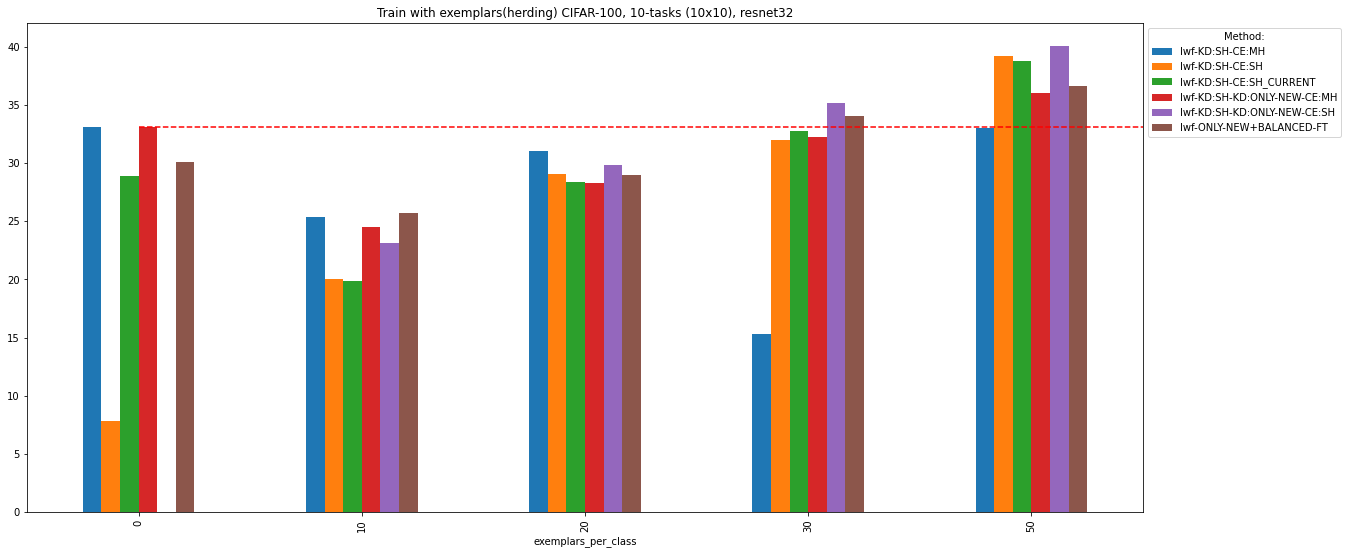

In [76]:
df_plot.plot.bar(figsize=(20, 9))
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title='Method:')
plt.title('Train with exemplars(herding) CIFAR-100, 10-tasks (10x10), resnet32')
plt.hlines(baseline_acc, 0, 50, color='r', linestyles='dashed')

Text(0.5, 1.0, 'Train with exemplars(herding) CIFAR-100, 11-tasks (1x50, 10x5), resnet32')

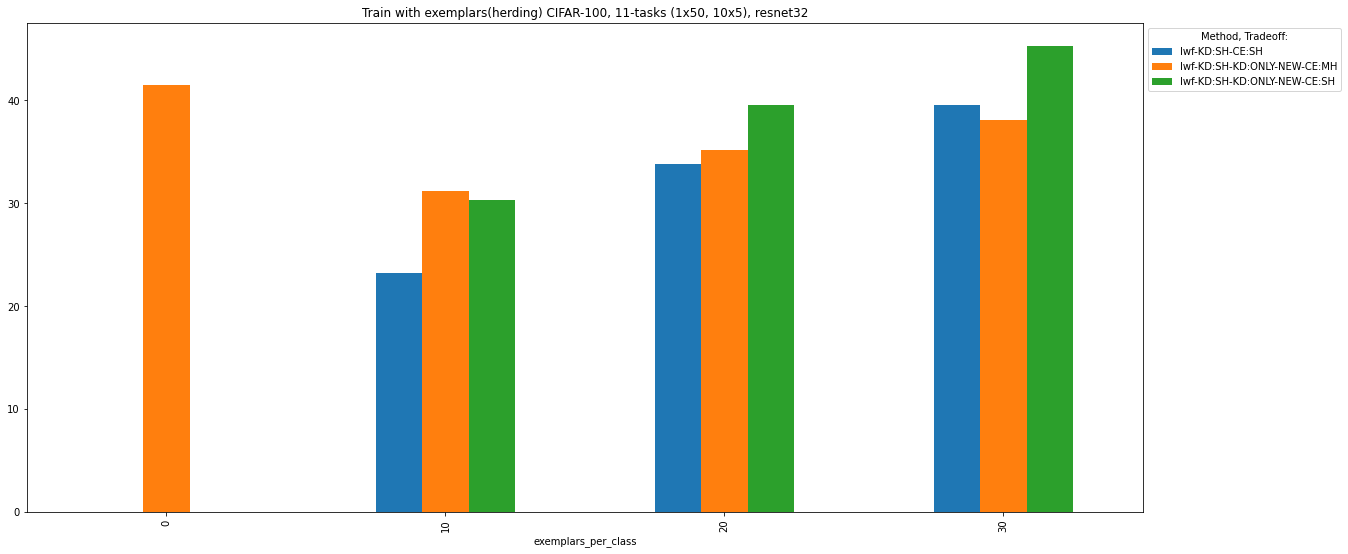

In [77]:
# plot 10 tasks
df_plot = df[(df.tasks == 11) & (df.exemplars_per_class <= 30)].pivot_table(index='exemplars_per_class', columns='method', values='acc')
df_plot.plot.bar(figsize=(20, 9))
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title='Method, Tradeoff:')
plt.title('Train with exemplars(herding) CIFAR-100, 11-tasks (1x50, 10x5), resnet32')


In [11]:
df[(df.exemplars_per_class == 0) & (df.tasks==10)]

,Dataset,acc,tasks,method,exemplars_per_class,dir
29,CIFAR-100,0.00,10,eeil-NO-DISTILL,0,../results_exemplars//cifar100_icarl_eeil_cifa...
14,CIFAR-100,14.88,10,ewc,0,../results_exemplars//cifar100_icarl_ewc_cifar...
84,CIFAR-100,10.28,10,finetune,0,../results_exemplars//cifar100_icarl_finetune_...
18,CIFAR-100,7.91,10,finetune-CE:SH,0,../results_exemplars//cifar100_icarl_finetune_...
20,CIFAR-100,33.07,10,lwf-KD:SH,0,../results_exemplars//cifar100_icarl_lwf_cifar...
60,CIFAR-100,33.07,10,lwf-KD:SH-CE:MH,0,../results_exemplars//cifar100_icarl_lwf_cifar...
16,CIFAR-100,7.80,10,lwf-KD:SH-CE:SH,0,../results_exemplars//cifar100_icarl_lwf_cifar...
94,CIFAR-100,28.90,10,lwf-KD:SH-CE:SH_CURRENT,0,../results_exemplars//cifar100_icarl_lwf_cifar...
77,CIFAR-100,33.07,10,lwf-KD:SH-KD:ONLY-NEW,0,../results_exemplars//cifar100_icarl_lwf_cifar...
65,CIFAR-100,33.07,10,lwf-KD:SH-KD:ONLY-NEW-CE:MH,0,../results_exemplars//cifar100_icarl_lwf_cifar...


KeyboardInterrupt: 

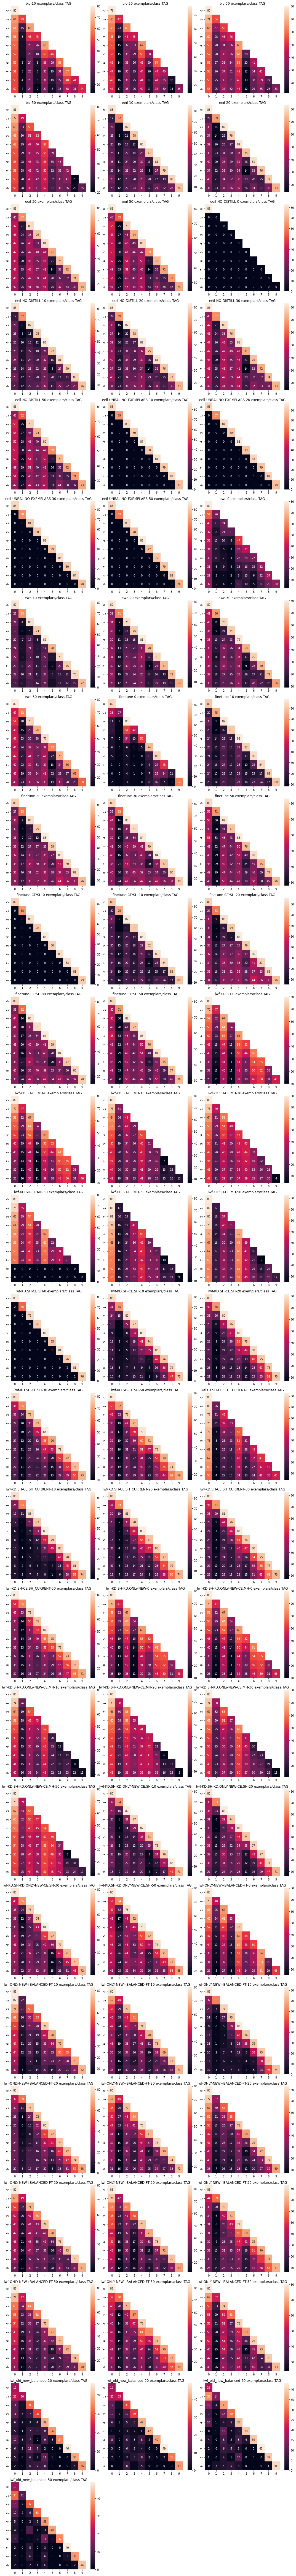

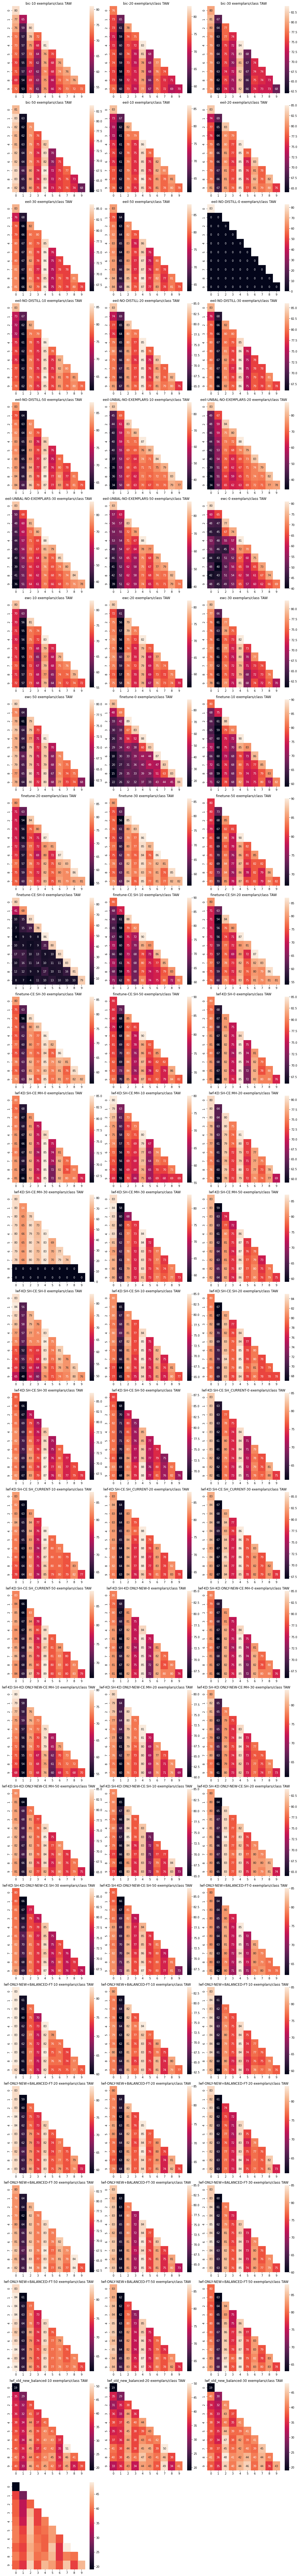

In [12]:
for eval_type in ['tag', 'taw']:
    _df = df[df.tasks==10]
    _df = _df.drop_duplicates(['Dataset', 'acc', 'tasks', 'method', 'exemplars_per_class'])
    _df = _df.sort_values(['method', 'exemplars_per_class'])
    N = len(_df)
    C = 3
    R = ceil(N / C)
    plt.figure(figsize=(C*5, R*5))
    for i, (_, r) in enumerate(_df.iterrows()):
        plt.subplot(R, C, i + 1)
        m = np.loadtxt(f"{r.dir}/results/acc_{eval_type}.txt")
        m *= 100
        m = m.astype(np.int)
        mask = np.zeros_like(m)
        mask[np.triu_indices_from(mask)] = True
        mask[np.arange(mask.shape[0]),np.arange(mask.shape[1])] = False
        sns.heatmap(m, annot=True, mask=mask)
        plt.title(f'{r.method}-{r.exemplars_per_class} exemplars/class {eval_type.upper()}')
        plt.tight_layout()